In [1]:
from regressionModels import randomForest
from regressionModels import tool_box
from extraction.extract import *
from extraction.extractionvalues import *
from regressionModels.tool_box import *
from extraction.airportvalues import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd


## Extract data
Extract all the data from the Eurocontrol dataset. Then filter out unrelevant data and outliers and save it in a correct way in a csv file. Data will be saved to a new folder called LRData but can be changed. The extracted data will be from the top 50 airports within Europe and a period between 2015 and 2019 by default.

In [2]:
start = datetime(2015, 1, 1)
end = datetime(2019, 12, 31)
airports = ICAOTOP50
print(f"Generating for {len(airports)} Airports")

a = extractData(start, end)
a = linearRegressionFormat(a, airports)
saveToCSV(a)

print(a.head(10))
print(f"Size of the dataset = {len(a)}")


Generating for 50 Airports


100%|██████████| 19/19 [03:17<00:00, 10.42s/it]


    ADEP  ADES            FiledOBT             FiledAT ACType ACOperator  \
0   KORD  EHAM 2015-03-01 00:00:00 2015-03-01 07:34:55   B763        UAL   
1   KORD  EGLL 2015-03-01 00:00:00 2015-03-01 07:15:35   B763        UAL   
2   KJFK  EGLL 2015-03-01 00:00:00 2015-03-01 06:31:15   B763        DAL   
4   KMSP  EGLL 2015-03-01 00:01:00 2015-03-01 07:17:16   B764        DAL   
5   KDFW  EGLL 2015-03-01 00:01:00 2015-03-01 07:44:33   B744        BAW   
6   KSLC  LFPG 2015-03-01 00:02:00 2015-03-01 09:30:23   B763        DAL   
7   LUKK  UUEE 2015-03-01 00:05:00 2015-03-01 01:53:41   A320        AFL   
8   OLBA  LFPG 2015-03-01 00:05:00 2015-03-01 04:39:13   A332        MEA   
9   OMDB  UKBB 2015-03-01 00:05:00 2015-03-01 05:51:03   B738        AUI   
10  LTBA  ORBI 2015-03-01 00:05:00 2015-03-01 02:34:34   B738        IAW   

    ArrivalDelay  DepartureDelay   ADEPLat   ADEPLong   ADESLat  ADESLong  \
0           44.0            60.0  41.98000  -87.90500  52.30806   4.76417   
1        

## Encode data

This will encode the data. The capacity of the airport per 15 min will be calculated, the categorial features will be encoded and the data will be scaled. The functions returns all relevant features for the airport as X and the labels, the arrival delays as y.


In [3]:
X, y = filtering_data_onehot(
    filename="LRData/LRDATA.csv",
    start=datetime(2018, 1, 1),
    end=datetime(2019, 12, 31),
    airport="EBBR",
    save_to_csv=False,
)
print(f"Size of the dataset = {len(y)}")


c:\Users\niels\OneDrive\1.TU Delft\Jaar 3\!Engineering with AI\Capstone_project\Air-traffic-delays-prediction-model\regressionModels\tool_box.py:119: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  lambda x: pd.datetime(x.year, x.month, x.day, x.hour, x.minute // 15 * 15, 0)


Size of the dataset = 95101


## Run RandomForest Regressor
Training and testing the RandomForestregressor. The hyperparamaters are the found optimal paramaters. If data for the requested airport was already saved in data uncomment first line. Otherwise run cell above and leave first line commented

In [4]:
# X, y = get_preprocessed_data(folderName= "data", fileName_x = "xdata.csv", fileName_y= "ydata.csv",)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

predictions = {}
forest = RandomForestRegressor(
    n_estimators=300,
    max_features="auto",
    max_depth=50,
    min_samples_split=10,
    min_samples_leaf=2,
    bootstrap=True,
    n_jobs=-1,
)
forest.fit(X_train, y_train)
prediction = forest.predict(X_test)

predictions["real"] = y_test
predictions["predicted"] = prediction
predictions["errors"] = prediction - y_test
score = mean_absolute_error(y_test, prediction)
print(f"The mean absolute error = {score}")


The mean absolute error = 3.785338678978956


## Plot Results

plotting.....


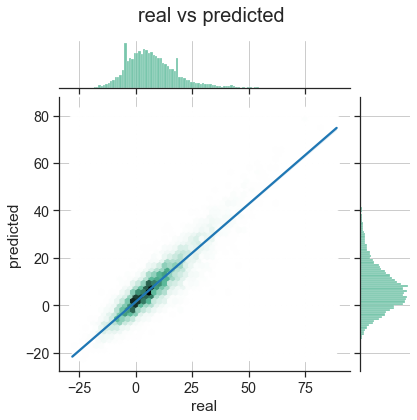

In [5]:
predictions_df = pd.DataFrame.from_dict(predictions)
plot(predictions_df, "real", "predicted")


## Run on multiple airports
Run The Random Forest on selected airports after eachother and save their errors. The errors of the top 50 airports in Europe are already saved to a dictionary called error_dict

In [ ]:
airports = ["EDDF", "LEMD"]
acc_dict = {}
for airport in airport_dict:
    print(f"Doing calculations for aiport: {airport}")
    X, y = filtering_data_onehot(
        filename="LRData/LRDATA.csv",
        start=datetime(2018, 1, 1),
        end=datetime(2019, 12, 31),
        airport=airport,
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42
    )
    forest = RandomForestRegressor(
        n_estimators=300,
        max_features="auto",
        max_depth=50,
        min_samples_split=10,
        min_samples_leaf=2,
        bootstrap=True,
        n_jobs=-1,
    )
    forest.fit(X_train, y_train)
    prediction = forest.predict(X_test)
    score = mean_absolute_error(y_test, prediction)
    print(f"Accuracy of {airport} = {score}")
    er_dict[airport] = score
    avg_error = sum(er_dict.values()) / len(er_dict)
print(f"Average error = {avg_error}")



## Plot errors of all airports
Plot the erros of the top 50 airports from Europe. Cell above does not need to be runned.



In [ ]:
plot_flightcount_vs_error()
